In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(trainX,trainy), (testX,testy) = load_data()

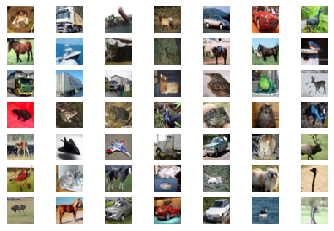

In [5]:
##plot images in pyplot
for i in range(49):
    plt.subplot(7,7,1+i)
    plt.axis('off')
    plt.imshow(trainX[i])

In [25]:
####Defining and training the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape, Flatten,Dropout, LeakyReLU
from keras.utils.vis_utils import plot_model

In [7]:
def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #normal
    model.add(Conv2D(64,(3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile model
    opt=Adam(lr=0.002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
    return model
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

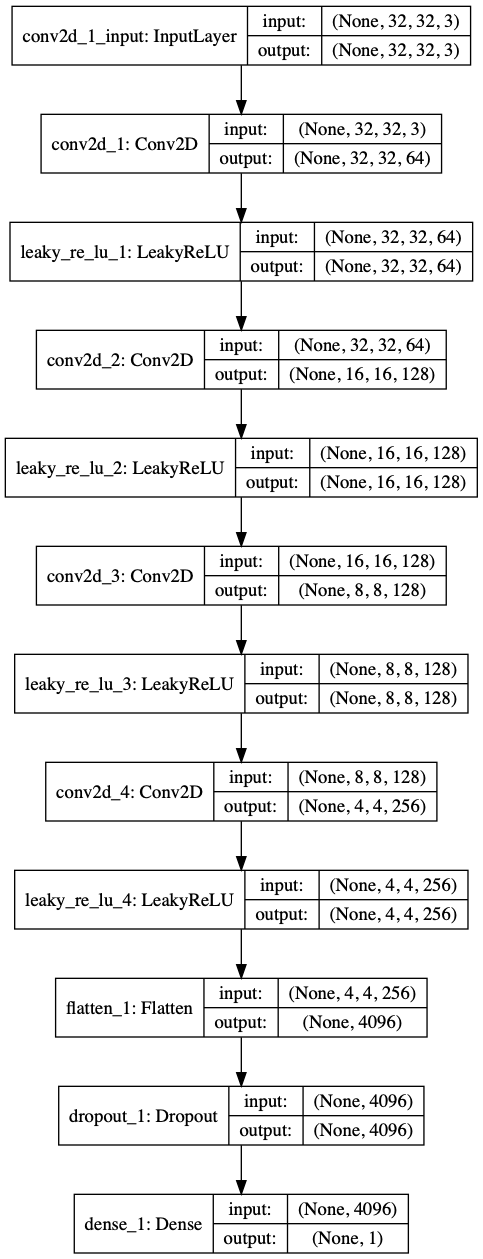

In [10]:
model = define_discriminator()
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [11]:
### Trainig the discriminator model on real and fake images

In [36]:
from numpy import ones, zeros
from numpy.random import rand, randint, randn


In [19]:
def load_real_samples():
    (trainX,_),(_,_)=load_data()
    X=trainX.astype('float32')
    X = (X-127.5)/127.5
    return X

In [20]:
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    X=dataset[ix]
    y=ones((n_samples,1))
    return X,y


In [21]:
#Generate n fake samples
def generate_fake_samples(n_samples):
    X=rand(32*32*3*n_samples)
    X=-1+X*2
    X=X.reshape((n_samples, 32,32,3))
    y=zeros((n_samples,1))
    return X,y

In [22]:
## Train the discriminator Model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch=int(n_batch/2)
    for i in range(n_iter):
        X_real,y_real = generate_real_samples(dataset, half_batch)
        _,real_acc = model.train_on_batch(X_real,y_real)
        
        X_fake,y_fake = generate_fake_samples(half_batch)
        _,fake_acc = model.train_on_batch(X_fake, y_fake)
        
        #Performance
        print('>%d real=%.0f%% fake =  %.0f%%' %(i+1, real_acc*100, fake_acc*100))
        

In [23]:
model = define_discriminator()
dataset=load_real_samples()
train_discriminator(model,dataset)


>1 real=94% fake =  0%
>2 real=75% fake =  0%
>3 real=84% fake =  83%
>4 real=94% fake =  97%
>5 real=91% fake =  100%
>6 real=94% fake =  100%
>7 real=97% fake =  100%
>8 real=100% fake =  100%
>9 real=100% fake =  100%
>10 real=100% fake =  100%
>11 real=100% fake =  100%
>12 real=100% fake =  100%
>13 real=100% fake =  100%
>14 real=100% fake =  100%
>15 real=100% fake =  100%
>16 real=100% fake =  100%
>17 real=100% fake =  100%
>18 real=100% fake =  100%
>19 real=100% fake =  100%
>20 real=100% fake =  100%


In [24]:
## DEFINING AND USING THE GENERATOR MODEL


In [26]:
def define_generator(latent_dim):
    model=Sequential()
    #Foundation for a 4x4 image
    n_nodes = 256*4*4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    
    #upsample to 8x8
    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #upsample to 16x16
    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #upsample to 32x32
    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #Output
    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
    return model
    
    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 16, 16, 128)      

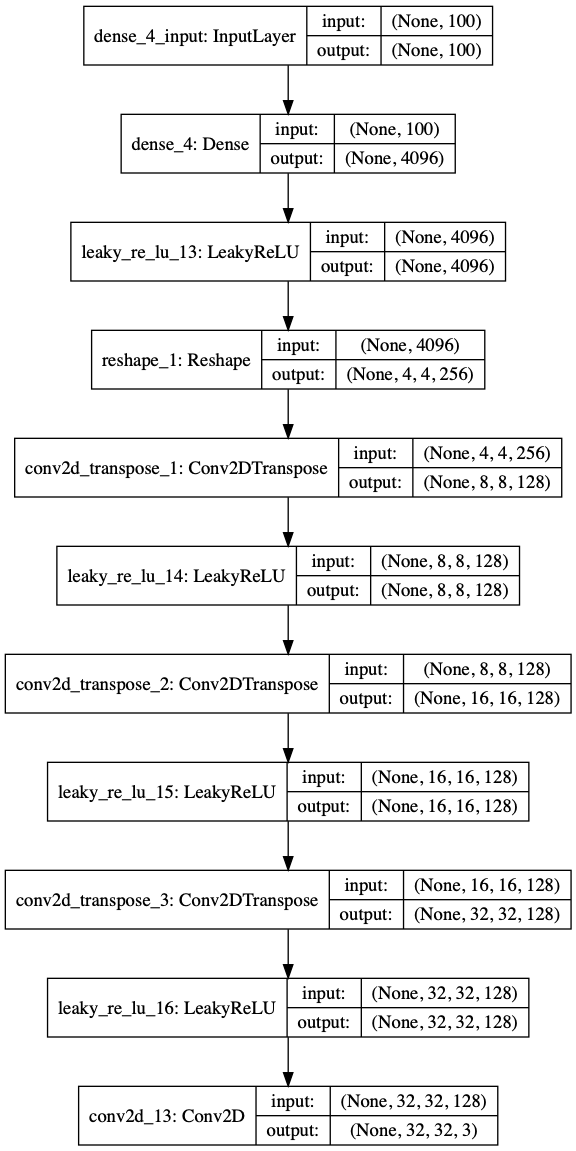

In [28]:
### Generate points in latent space as inputs for the generator
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim*n_samples)
    x_input = x_input.reshape(n_samples,latent_dim)
    return x_input

In [33]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    #predict outputs
    X = g_model.predict(x_input)
    #create fake class lables
    y=zeros((n_samples,1))
    return X,y

In [34]:
latent_dim=100
model = define_generator(latent_dim)
model.summary()
#plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 16, 16, 128)      

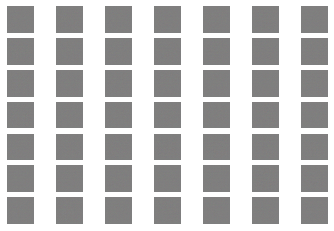

In [37]:
n_samples = 49
X,_ = generate_fake_samples(model, latent_dim, n_samples)
X=(X+1)/2.0 #[from -1,1 to 0,1]

#plot
for i in range(n_samples):
    plt.subplot(7,7,i+1)
    plt.axis('off')
    plt.imshow(X[i])
plt.show()

In [38]:
def define_gan(g_model, d_model):
    d_model.trainable=False
    #connect
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt=Adam(lr=0.0002, beta_1 = 0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [ ]:
def train_gan(gam_model, latent_dim, n_epochs=200, n_batch=128):
    for i in range(n_epochs):
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch,1))
        gan_model.train_on_batch(x_gan, y_gan)